# Trees in Camden
Use this notebook to complete your analysis.
Enter code and comments after the TODOs.

There are some code cells completed for you.  These are highlighted with a <font style="color:crimson;background-color:lemonchiffon">TODO</font> comment.  You can use these to guide the subsequent tasks.  Other cells require you to read documentation or search for answers.  The markdown comments give you links to some useful documentation and articles.  Read the documentation, look at the examples provided in the documentation and then try to apply them to your data.

Remember that you can find information on the pandas functions on the Pandas website https://pandas.pydata.org/pandas-docs/stable/reference/frame.html or directly in the notebook by puttin a ? before or after the function name. for instance: `?df.head()` or `df['Maturity'].value_counts()?`

## Imports
Import the libraries we need to perform the analysis.

In [2]:
import pandas as pd

## Task 2: Load Data and Perform Initial Exploration
Load the data from the supplied data files.  The files are in different **file formats**, but Pandas can handle this.

You should read the data in using the appropriate function:

- [pandas.read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)
- [pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
- [pandas.read_json](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.read_json.html)

You can then inspect the first few rows of the loaded dataframe:

[pandas.DataFrame.head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)

You can get the number of rows and columns:

[pandas.DataFrame.shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html)

You can get the list of column names:

[pandas.DataFrame.columns](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html)

And you can list the data types of the columns:

[pandas.DataFrames.dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html)

I've done the first one (loading `"camden_trees.xlsx"`) for you.  Please load `"camden_trees_environmental.csv"` and `"tree_common_names.json"` and analyse them in the same way.


### 2.1 Trees
The file `"camden_trees.xlsx"` is an Excel file, so we use the `read_excel()` function.

In [3]:
# Create a Pandas dataframe called trees that contains the contents of the Excel file
url= r'C:\Users\write\OneDrive\Desktop\OpenClassroom\Project 3\camden_trees.xlsx'
trees = pd.read_excel(url)

We can now inspect the first few rows using `head()`.  By default, `head()` displays the first 5 rows.

In [4]:
# Display the first few rows
trees.head()

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
0,00060053,1.0,Russell Nurseries Estate,Housing,Vacant Tree Pit,NaT,NaN,NaN,NaN,NaN,E05000135,Hampstead Town,527305,185240,-0.165240,51.551693,"(51.551693, -0.16524)"
1,00057855,1.0,BRECKNOCK JMI (E),Education,Vacant Tree Pit,2019-07-17,2022/2023,NaN,NaN,NaN,E05000131,Cantelowes,529923,184782,-0.127681,51.546984,"(51.546984, -0.127681)"
2,00059953,1.0,Estate 51 Ravenshaw Street,Housing,Ficus carica,NaT,NaN,5.0,4.0,10.0,NaN,NaN,0,0,NaN,NaN,NaN
3,00059915,1.0,ROSARY RC JMI (E),Education,Betula jacquemontii,NaT,NaN,4.0,1.0,6.0,E05000135,Hampstead Town,527249,185261,-0.166051,51.551901,"(51.551901, -0.166051)"
4,00010762,1.0,Holly Lodge Estate,Housing,Ilex x altaclarensis,2017-06-14,2020/2021,14.0,6.0,26.0,E05000137,Highgate,528414,186770,-0.148704,51.565198,"(51.565198, -0.148704)"


It's good to understand the size of the dataset we are dealing with.  The `shape` property does this for us.

In [5]:
# Get the number of rows and columns
trees.shape

(23444, 17)

If there are lots of columns we can't always see all of them in the `head()` list above.  We can use the `columns` property to get a full list:

In [6]:
# Get a list of all the columns in the dataframe
trees.columns

Index(['Identifier', 'Number Of Trees', 'Site Name', 'Contract Area',
       'Scientific Name', 'Inspection Date', 'Inspection Due Date',
       'Height In Metres', 'Spread In Metres',
       'Diameter In Centimetres At Breast Height', 'Ward Code', 'Ward Name',
       'Easting', 'Northing', 'Longitude', 'Latitude', 'Location'],
      dtype='object')

In order to process the data properly, we should understand the data type for each column.  Pandas attempts to work this out for us, but sometimes we need to give it a bit of a hand.  We can use the `dtypes` property to list the data types.  Note that `object` is Pandas way of saying `string`, i.e. a text data type.

In [7]:
# List the data types of each column
trees.dtypes

Identifier                                          object
Number Of Trees                                    float64
Site Name                                           object
Contract Area                                       object
Scientific Name                                     object
Inspection Date                             datetime64[ns]
Inspection Due Date                                 object
Height In Metres                                   float64
Spread In Metres                                   float64
Diameter In Centimetres At Breast Height           float64
Ward Code                                           object
Ward Name                                           object
Easting                                              int64
Northing                                             int64
Longitude                                          float64
Latitude                                           float64
Location                                            obje

In [8]:
trees.info

<bound method DataFrame.info of       Identifier  Number Of Trees                         Site Name  \
0       00060053              1.0          Russell Nurseries Estate   
1       00057855              1.0                 BRECKNOCK JMI (E)   
2       00059953              1.0        Estate 51 Ravenshaw Street   
3       00059915              1.0                 ROSARY RC JMI (E)   
4       00010762              1.0                Holly Lodge Estate   
...          ...              ...                               ...   
23439   00057455              1.0  KILBURN GRANGE, MESSINA AVE (LS)   
23440   00015494              1.0                  OSSULSTON STREET   
23441   00001693              1.0                    BELMONT STREET   
23442   00020342              1.0              Templar House Estate   
23443   00013369              1.0                    LYNDHURST ROAD   

      Contract Area          Scientific Name Inspection Date  \
0           Housing          Vacant Tree Pit       

### 2.2 Environmental
The file `"camden_trees_environmental.csv"` is a csv file.  Use the appropriate function to load it into a Pandas DataFrame.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [9]:
# Create a Pandas dataframe called environmental that contains the contents of the csv file
environmental = pd.read_csv(r'C:\Users\write\OneDrive\Desktop\OpenClassroom\Project 3\camden_trees_environmental.csv')

In [10]:
# Display the first few rows
environmental.head()

,Identifier,Maturity,Physiological Condition,Tree Set To Be Removed,Removal Reason,Capital Asset Value For Amenity Trees,Carbon Storage In Kilograms,Gross Carbon Sequestration Per Year In Kilograms,Pollution Removal Per Year In Grams
0,00055125,Juvenile,Good,No,NaN,115.07,1.6,0.5,5.7
1,00059429,Middle aged,Fair,No,NaN,7518.08,NaN,NaN,NaN
2,00018254,Mature,Fair,No,NaN,20419.63,426.4,8.8,215.2
3,00027155,Mature,Fair,No,NaN,21447.74,448.3,9.6,379.1
4,00041326,Juvenile,Good,No,NaN,524.30,9.9,1.4,12.8


In [11]:
# Get the number of rows and columns
environmental.shape

(23415, 9)

In [12]:
# Get a list of all the columns in the dataframe
environmental.columns

Index(['Identifier', 'Maturity', 'Physiological Condition',
       'Tree Set To Be Removed', 'Removal Reason',
       'Capital Asset Value For Amenity Trees', 'Carbon Storage In Kilograms',
       'Gross Carbon Sequestration Per Year In Kilograms',
       'Pollution Removal Per Year In Grams'],
      dtype='object')

In [13]:
# List the data types of each column
environmental.dtypes

Identifier                                           object
Maturity                                             object
Physiological Condition                              object
Tree Set To Be Removed                               object
Removal Reason                                       object
Capital Asset Value For Amenity Trees               float64
Carbon Storage In Kilograms                         float64
Gross Carbon Sequestration Per Year In Kilograms    float64
Pollution Removal Per Year In Grams                 float64
dtype: object

<hr/>

### 2.3 Common and Scientific Names
The file `"tree_common_names.json"` is a json file.  Use the appropriate function to load it into a Pandas DataFrame.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [14]:
# Create a Pandas dataframe called names that contains the contents of the json file
names = pd.read_json(r'C:\Users\write\OneDrive\Desktop\OpenClassroom\Project 3\tree_common_names.json')

In [15]:
# Display the first few rows
names.head()

,Scientific Name,Common Name
0,Carpinus betulus Lucas,Hornbeam - European
1,Prunus 'Pandora',Cherry - Ornamental
2,Tilia unidentified species,Lime
3,Rosa unidentified species,None
4,Cedrus libani,Cedar of Lebanon


In [16]:
# Get the number of rows and columns
names.shape

(589, 2)

In [17]:
# Get a list of all the columns in the dataframe
names.columns

Index(['Scientific Name', 'Common Name'], dtype='object')

In [18]:
# List the data types of each column
names.dtypes

Scientific Name    object
Common Name        object
dtype: object

<hr/>

### 2.4 Review
At the end of this task you should have a good basic understanding of the contents and overall shape of the different data files.  If you don't, do back and review the outputs above.

## Task 3: Further Inspect the Datasets
The initial inspection gave you a very high-level understanding of the data.  We will now drill a bit deeper and try to understand the data column-by-column.

For columns with a string data type (`object` in Pandas) we have **qualitative** data.  It would be good to know how many *different* values we have in the column, what those values are and the *count* how many of each different value we have.  This will help us understand if the qualitative variable is **binary**, **nominal** or **ordinal**.

For columns with a numeric data type (`int` or `float`) we have **quantitative** data.  Usually integer type variables can the thought of as **discrete** and float type variables can be thought of as **continuous**.  It would be good to know some summary descriptive statistics for these columns.   

If you are unsure of what these different data classifications mean, read this:

[Types of Variables](https://openclassrooms.com/en/courses/6037301-perform-an-initial-data-analysis/6051886-discover-the-four-variable-types)

You can get the list of values and counts for a column using this function:

[pandas.Series.value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

You can get the descriptive statistics for a DataFrame using this function:

[pandas.DataFrame.describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

Note that Pandas may treat integer columns as floats if there are null values in the columns.  So if you see a float data type it might be worth checking the actual values to confirm if it really is a float or if it really is an int with nulls.  You can check the actual values with:

[pandas.Series.unique](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html)



### 3.1 Further Inspect the Trees Dataset
Let's start with the trees dataset.


#### 3.1.a Counts of Values for String Types Columns
Go through each column that is a string (object) type and count the number of rows for each value in the column.  After each one, classify the data as binary, nominal or ordinal using a markdown comment.

I've done the first one for you.


**Site Name**

In [19]:
trees.head()

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
0,00060053,1.0,Russell Nurseries Estate,Housing,Vacant Tree Pit,NaT,NaN,NaN,NaN,NaN,E05000135,Hampstead Town,527305,185240,-0.165240,51.551693,"(51.551693, -0.16524)"
1,00057855,1.0,BRECKNOCK JMI (E),Education,Vacant Tree Pit,2019-07-17,2022/2023,NaN,NaN,NaN,E05000131,Cantelowes,529923,184782,-0.127681,51.546984,"(51.546984, -0.127681)"
2,00059953,1.0,Estate 51 Ravenshaw Street,Housing,Ficus carica,NaT,NaN,5.0,4.0,10.0,NaN,NaN,0,0,NaN,NaN,NaN
3,00059915,1.0,ROSARY RC JMI (E),Education,Betula jacquemontii,NaT,NaN,4.0,1.0,6.0,E05000135,Hampstead Town,527249,185261,-0.166051,51.551901,"(51.551901, -0.166051)"
4,00010762,1.0,Holly Lodge Estate,Housing,Ilex x altaclarensis,2017-06-14,2020/2021,14.0,6.0,26.0,E05000137,Highgate,528414,186770,-0.148704,51.565198,"(51.565198, -0.148704)"


In [20]:
# List of values in Site Name column and their counts
trees["Site Name"].value_counts()

WATERLOW PARK (LS)                         920
Alexandra & Ainsworth Estate               289
Belsize nature reserve, Russell Nursery    278
Holly Lodge Estate                         272
LINCOLN'S INN FIELDS, GARDENS (LS)         193
                                          ... 
Estate 1-8 Wimbledon House (cons)            1
BRACKNELL WAY                                1
BELSIZE PLACE                                1
DALEHAM GARDENS                              1
Estate 1-5 Oriel Court (cons)                1
Name: Site Name, Length: 1135, dtype: int64

Site Name is **qualitative nominal**.

Now do the same on the other string columns.  Use `value_counts()` and then classify as binary, ordered or unordered using a markdown comment.  As you do each one, stop and look at the values and counts and think about how the data in the column might be useful for supporting the council's initiatives.  Don't just treat this as a mechanical copy/paste task. The objective is, after all, to get really intimate with the data!

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Enter your code below.  Use one code cell per column and then add a markdown cell after each one to classify the column as in the above example.  Add as many cells as you need.
    </font></div>

In [21]:
# List of values in Identifier column and their counts
trees["Identifier"].value_counts()

00060087    2
00000999    2
00022744    2
00032549    2
00060088    2
           ..
00003407    1
00053951    1
00012108    1
00010134    1
00016700    1
Name: Identifier, Length: 23438, dtype: int64

Identifier is **qualitative nominal.**

In [22]:
# List of values in Contract Area column and their counts
trees["Contract Area"].value_counts()

Highways              10062
Housing                7500
Parks                  4330
Education              1288
Corporate Landlord      264
Name: Contract Area, dtype: int64

Contract Area is **qualitative nominal.**

In [23]:
# List of values in scientific Name column and their counts
trees["Scientific Name"].value_counts()

Platanus x hispanica              3340
Tilia europaea                    1468
Acer pseudoplatanus                941
Betula pendula                     765
Fraxinus excelsior                 754
                                  ... 
Sequoia sempervirens                 1
Tilia americana American sentr       1
Acer campestre Lienco                1
x Cupresocyparis leylandii 'Ca       1
Quercus castaneifolia                1
Name: Scientific Name, Length: 543, dtype: int64

Scientific Name is **qualitative nominal.**

In [24]:
# List of values in Inspection Date column and their counts
trees["Inspection Date"].value_counts()

2017-10-07    259
2018-08-29    224
2019-06-25    190
2019-10-30    188
2017-06-13    187
             ... 
2015-03-12      1
2020-01-15      1
2017-04-18      1
2014-11-13      1
2017-09-29      1
Name: Inspection Date, Length: 414, dtype: int64

Inspection Date is **qualitative ordinal.**

In [25]:
# List of values in Inspection Due Date column and their counts
trees["Inspection Due Date"].value_counts()

2022/2023    7921
2021/2022    7353
2020/2021    6577
2019/2020    1157
2018/2019      16
2017/2018       5
2001/2002       4
2016/2017       4
2003/2004       2
2006/2007       1
2012/2013       1
2011/2012       1
2013/2014       1
Name: Inspection Due Date, dtype: int64

Inspection Due Date is **qualitative ordinal**

In [26]:
# List of values in Ward Code column and their counts
trees["Ward Code"].value_counts()

E05000137    2799
E05000143    1832
E05000134    1541
E05000140    1540
E05000139    1463
E05000136    1424
E05000135    1340
E05000138    1293
E05000132    1284
E05000131    1231
E05000133    1229
E05000129    1008
E05000142     989
E05000144     978
E05000130     899
E05000145     853
E05000141     824
E05000128     691
Name: Ward Code, dtype: int64

Ward Code is **qualitative nominal.**

In [27]:
# List of values in Ward Name column and their counts
trees["Ward Name"].value_counts()

Highgate                          2799
St Pancras and Somers Town        1832
Gospel Oak                        1541
Kilburn                           1540
Kentish Town                      1463
Haverstock                        1424
Hampstead Town                    1340
Holborn and Covent Garden         1293
Fortune Green                     1284
Cantelowes                        1231
Frognal and Fitzjohns             1229
Bloomsbury                        1008
Regent's Park                      989
Swiss Cottage                      978
Camden Town with Primrose Hill     899
West Hampstead                     853
King's Cross                       824
Belsize                            691
Name: Ward Name, dtype: int64

Ward Name is **qualitative nominal.**

In [28]:
# List of values in Location column and their counts
trees["Location"].value_counts()

(51.553475, -0.152668)    3
(51.556205, -0.173776)    3
(51.549408, -0.135008)    2
(51.531714, -0.130798)    2
(51.51866, -0.122961)     2
                         ..
(51.537391, -0.13861)     1
(51.521424, -0.122361)    1
(51.568242, -0.146828)    1
(51.553067, -0.158371)    1
(51.546727, -0.151163)    1
Name: Location, Length: 23262, dtype: int64

Location is **qualitative nominal.**

<hr/>

#### 3.1.b Descriptive Stats for Numeric Type Columns
Use the `describe()` function to get the descriptive stats for the numeric columns.

For each column, classify the column as discrete or continuous (use the data type to guide you, but check any floats to confirm whether they are really floats or just ints with null values.  Use `pandas.Series.unique()` to check this).


<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [29]:
# Get the descriptive stats for the Number Of Trees in numeric columns
trees["Number Of Trees"].describe()

count    23422.000000
mean         1.100034
std          1.288041
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         67.000000
Name: Number Of Trees, dtype: float64

Number Of Trees is **quantitative discrete.**

In [30]:
# Get the descriptive stats for Height In Metres in the numeric columns
trees["Height In Metres"].describe()

count    23006.000000
mean        10.307029
std          6.325293
min          0.000000
25%          5.000000
50%          9.000000
75%         15.000000
max        127.000000
Name: Height In Metres, dtype: float64

Height In Metres is **quantitative continous.**

In [31]:
# Get the descriptive stats for Spread In Metres in the numeric columns
trees["Spread In Metres"].describe()

count    23006.000000
mean         5.997612
std          4.132379
min          0.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         88.000000
Name: Spread In Metres, dtype: float64

Spread In Metres is **quantitative continous.**

In [32]:
# Get the descriptive stats for Diameter In Centimetres At Breast Height s in the numeric columns
trees["Diameter In Centimetres At Breast Height"].describe()

count    23005.000000
mean        32.595262
std         26.149994
min          0.000000
25%         12.000000
50%         27.000000
75%         46.000000
max        228.000000
Name: Diameter In Centimetres At Breast Height, dtype: float64

Diameter In Centimetres At Breast Height is **quantitative continous.**

In [33]:
# Get the descriptive stats for Easting in the numeric columns
trees["Easting"].describe()

count     23444.000000
mean     526762.518171
std       25835.857212
min           0.000000
25%      526583.750000
50%      528456.500000
75%      529369.000000
max      531514.000000
Name: Easting, dtype: float64

Easting is **quantitative discrete.**

In [34]:
# Get the descriptive stats for Northing in the numeric columns
trees["Northing"].describe()

count     23444.000000
mean     184085.188662
std        9121.059755
min           0.000000
25%      183665.000000
50%      184690.000000
75%      185481.000000
max      196188.000000
Name: Northing, dtype: float64

Northing is **quantitative discrete.**

In [35]:
# Get the descriptive stats for Longitude in the numeric columns
trees["Longitude"].describe()

count    23388.000000
mean        -0.155145
std          0.025058
min         -0.261719
25%         -0.175734
50%         -0.148478
75%         -0.135978
max         -0.105858
Name: Longitude, dtype: float64

Longitude is **quantitative continous.**

In [36]:
# Get the descriptive stats for latitude in the numeric columns
trees["Latitude"].describe()

count    23388.000000
mean        51.545115
std          0.013067
min         51.512858
25%         51.537472
50%         51.546669
75%         51.554032
max         51.650843
Name: Latitude, dtype: float64

Latitude is **quantitative continous.**

<hr/>

Find out if floats are really floats or ints with nulls.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Enter your code below.  Use one code cell per column.   Add as many cells as you need.
    </font></div>

In [37]:
trees["Number Of Trees"].unique()

array([ 1.,  2.,  3.,  0., nan,  5.,  6.,  7., 18.,  8., 65.,  4., 10.,
        9., 11., 50., 12., 15., 52., 40., 33., 13., 20., 67., 21., 32.,
       24., 26., 16., 25., 51.])

In [38]:
trees["Height In Metres"].unique()

array([  nan,   5. ,   4. ,  14. ,   9. ,   0. ,   2. ,   2.5,   8. ,
        13. ,  17. ,  10. ,   3. ,  19. ,   7. ,   6. ,   1.8,  15. ,
        12. ,   1.5,  16. ,  20. ,  21. ,  24. ,  25. ,   2.7,  18. ,
        11. ,  26. ,  22. ,   0.5,  16.1,  27. ,  28. ,   2.3,  22.3,
        38. ,  15.5,  29. ,  23. ,  34. ,   3.5,   2.6,   1. ,   5.5,
        22.5,   2.2,  36. ,  31. ,  96. ,  13.6, 127. ,  14.7,   4.5,
        30. ,  35. ,  32. ,   9.4,  11.8,  33. ,  40. ,   2.1,   6.5,
        41. ,  23.1,  37. ,  39. ,  12.5,   7.5,  13.7,  31.6,  23.8,
         0.2,  12.3,  15.7,   6.8,   9.3,   3.8,  24.9,  17.4,   2.8,
         3.2,  13.9,  12.4,  10.2,  10.8,  24.5,  30.4,   9.8,  11.4,
        23.4,   3.7,  11.6,   7.7,   8.3,   3.6,  17.5,  19.5])

In [39]:
trees["Spread In Metres"].unique()

array([  nan,  4.  ,  1.  ,  6.  ,  7.  ,  0.  ,  1.5 ,  5.  ,  9.  ,
       10.  ,  3.  ,  2.  , 13.  ,  2.5 , 12.  , 15.  , 14.  ,  8.  ,
       11.  ,  0.6 ,  1.8 , 17.  , 20.  , 18.  , 16.  , 22.  , 19.  ,
        5.5 , 26.  ,  1.4 , 23.  , 21.  , 28.  ,  1.2 ,  0.5 ,  3.5 ,
       24.  ,  1.3 ,  1.6 , 30.  ,  1.7 , 27.  ,  4.2 , 11.02,  0.7 ,
        6.5 ,  4.5 , 31.  , 25.  ,  0.8 ,  0.3 ,  2.2 ,  2.8 ,  1.65,
       29.  , 88.  ])

In [40]:
trees["Diameter In Centimetres At Breast Height"].unique()

array([  nan,  10. ,   6. ,  26. ,  29. ,   5. ,   0. ,   4. ,  12. ,
        59. ,  52. ,  23. ,  50. ,  63. ,  15. ,   3. ,  49. ,  42. ,
        14. ,  19. ,   9. ,  70. ,  32. ,  28. ,  34. ,  20. ,  17. ,
        27. ,  37. ,   8. ,  45. ,  18. , 119. ,   7. ,  38. ,  55. ,
        41. ,  75. ,  31. ,  25. ,  11. ,  30. ,  43. ,  68. ,  92. ,
        16. ,  35. ,  58. ,  72. ,  64. ,  13. ,  61. ,  69. ,  33. ,
        47. ,  67. , 109. , 106. ,  24. ,  51. ,  40. ,  22. ,  60. ,
        39. ,  46. ,  57. ,  21. ,  54. , 117. ,  44. ,  82. , 114. ,
        65. ,  84. , 118. ,   1. ,  89. ,  53. ,  36. ,  93. ,  88. ,
        86. , 163. ,  66. ,  81. ,  74. , 100. ,  48. ,  73. ,  95. ,
       129. ,  62. ,  85. ,  56. ,   3.5, 161. ,  71. , 105. , 102. ,
        80. ,  87. , 101. ,  76. , 113. , 108. , 160. , 132. ,  90. ,
       145. , 130. ,  79. , 228. , 110. ,  83. ,  78. , 122. , 170. ,
       115. ,   2. ,  77. , 107. ,  96. , 126. ,  91. , 104. , 158. ,
        99. ,  94. ,

In [41]:
trees["Easting"].unique()

array([527305, 529923,      0, ..., 527733, 524398, 525944], dtype=int64)

In [42]:
trees["Northing"].unique()

array([185240, 184782,      0, ..., 185755, 187062, 187313], dtype=int64)

In [43]:
trees["Longitude"].unique()

array([-0.16524 , -0.127681,       nan, ..., -0.196884, -0.204206,
       -0.173397])

In [44]:
trees["Latitude"].unique()

array([51.551693, 51.546984,       nan, ..., 51.54329 , 51.545726,
       51.531863])


<hr/>

Classify the columns as discrete or continuous.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Enter markdown below.
</div>

Number Of Trees is **quantitative discrete.** It is integer with null values

Height In Metres is **quantitative continous.**

Spread In Metres is **quantitative continous.**

Diameter In Centimetres At Breast Height is **quantitative continous.**

Easting is **quantitative discrete.**

Northing is **quantitative discrete.**

Longitude is **quantitative continous.**

Latitude is **quantitative continous.**

<hr/>

### 3.2 Further Inspect the Environmental Dataset
Now repeat the above for the environmental dataset.

#### 3.2.a Counts of Values for String Type Columns 
For each string column in the environmental dataset show the counts of the unique values.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
    TODO: Enter your code below.  Use one code cell per column and then add a markdown cell after each one to classify the column.  Add as many cells as you need.
</font></div>

In [45]:
# List of values in Identifier column and their counts
environmental["Identifier"].value_counts()

00034160    1
00011927    1
00031779    1
00045261    1
00005078    1
           ..
00005237    1
00014821    1
00014067    1
00003040    1
00016700    1
Name: Identifier, Length: 23415, dtype: int64

Identifier is **qualitative nominal**

In [46]:
# List of values in Maturity column and their counts
environmental["Maturity"].value_counts()

Mature            10225
Middle aged        7779
Juvenile           4393
Not Applicable      377
Over Mature         191
Veteran              41
Name: Maturity, dtype: int64

Maturity is **qualitative ordinal**

In [47]:
# List of values in Maturity column and their counts
environmental["Physiological Condition"].value_counts()

Good              12910
Fair               9183
Poor                357
Not applicable      249
Dead                236
Excellent             8
Name: Physiological Condition, dtype: int64

Physiological Condition is **qualitative nominal**

In [48]:
# List of values in Maturity column and their counts
environmental["Tree Set To Be Removed"].value_counts()

No     23331
Yes       84
Name: Tree Set To Be Removed, dtype: int64

Tree Set To Be Removed is **qualitative dichotomous (Boolean)**

In [49]:
# List of values in Maturity column and their counts
environmental["Removal Reason"].value_counts()

Dead, dying                    30
Basal decay                    17
Trunk decay                    10
Tree defect                     5
Crown die-back                  5
Unsuitable location             3
Dog damage                      3
Newly planted tree failure      2
Crown decay                     1
Broken/split branch             1
ATRD                            1
Coppiced stump                  1
Split trunk                     1
Climber                         1
No defects - work required      1
Touching building/structure     1
Suppressed                      1
Name: Removal Reason, dtype: int64

 Removal Reason is **qualitative nominal**

<hr/>

#### 3.2.b Descriptive Stats for Numeric Type Columns
For each numeric column in the environmental dataset show the descriptive stats

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [50]:
# Get the descriptive stats for Capital Asset Value For Amenity Trees numeric columns
environmental["Capital Asset Value For Amenity Trees"].describe()

count     22982.000000
mean      14056.393047
std       24803.806595
min           0.000000
25%        1035.650000
50%        5443.660000
75%       16781.420000
max      504725.720000
Name: Capital Asset Value For Amenity Trees, dtype: float64

Capital Asset Value For Amenity Trees is **quantitative continous.**

In [51]:
# Get the descriptive stats for Carbon Storage In Kilograms numeric columns
environmental["Carbon Storage In Kilograms"].describe()

count    20555.000000
mean       467.465454
std        844.926555
min          0.500000
25%         24.800000
50%        163.900000
75%        497.300000
max       6000.000000
Name: Carbon Storage In Kilograms, dtype: float64

Carbon Storage In Kilograms is **quantitative continous.**

In [52]:
# Get the descriptive stats for Gross Carbon Sequestration Per Year In Kilograms numeric columns
environmental["Gross Carbon Sequestration Per Year In Kilograms"].describe()

count    20555.000000
mean         8.675057
std          8.681446
min          0.000000
25%          2.200000
50%          6.100000
75%         11.700000
max         53.800000
Name: Gross Carbon Sequestration Per Year In Kilograms, dtype: float64

Gross Carbon Sequestration Per Year In Kilograms is **quantitative continous.**

In [53]:
# Get the descriptive stats for Pollution Removal Per Year In Grams numeric columns
environmental["Pollution Removal Per Year In Grams"].describe()

count    20555.000000
mean       217.740316
std        306.751920
min          0.300000
25%         29.300000
50%        108.100000
75%        297.600000
max       8223.700000
Name: Pollution Removal Per Year In Grams, dtype: float64

Pollution Removal Per Year In Grams is **quantitative continous.**

<hr/>

Find out if floats are really floats or ints with nulls.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Enter your code below.  Use one code cell per column.   Add as many cells as you need.
    </font></div>

In [54]:
environmental["Capital Asset Value For Amenity Trees"].unique()

array([1.1507000e+02, 7.5180800e+03, 2.0419630e+04, ..., 3.3664130e+04,
       3.6269450e+04, 1.4801215e+05])

In [55]:
environmental["Carbon Storage In Kilograms"].unique()

array([1.6000e+00,        nan, 4.2640e+02, ..., 4.7233e+03, 3.7305e+03,
       4.8100e+02])

In [56]:
environmental["Gross Carbon Sequestration Per Year In Kilograms"].unique()

array([ 0.5,  nan,  8.8,  9.6,  1.4, 10.1,  0.8,  7.9, 24.2,  2.4,  0.9,
        3. , 14.6,  8.1,  4.1,  1.8, 18.8, 24.4, 13.4,  4.3,  6.5,  1.3,
        0.6,  2.5, 13.1,  2.1,  3.9, 15.9,  1. ,  6.6,  0.4,  3.4,  2.9,
       28.7,  0.7,  1.5, 12.5, 25.4, 11.2,  9. , 23.9,  4.4, 11.5, 11. ,
        8.4, 10.9, 10.7,  6.9,  7. ,  3.8,  3.2,  6.1,  8.6, 30.2,  3.7,
       15. , 30.4,  7.6, 20.1, 10.2,  8.3, 39.9,  0.3,  4.9, 14.3, 13.5,
       16.7,  8.9,  1.6,  4.2,  3.6,  4. ,  6.7,  0.1, 19.7, 24.6,  6.4,
        5.4,  5.9, 12.2,  7.3, 13. ,  7.1, 36.9,  9.3, 18.2, 10. ,  4.7,
        5. , 29.8, 17.8, 18.5, 17.6,  7.2,  4.8,  5.6,  5.3, 10.5, 12.9,
        9.4,  7.8,  1.1, 19.2, 37.3,  2.7, 12.8, 17. , 15.5, 27.6, 34.2,
        5.7,  5.8, 17.3, 20.4,  9.9, 15.6,  7.4, 11.8,  9.2,  2.6, 21.7,
       11.3, 10.8, 29.4, 23.1, 26.5,  1.2, 10.6, 33.6, 23.6, 11.7, 17.4,
       15.1, 16.6,  2.3, 13.3, 16.3, 18.3, 10.4, 19. ,  1.7,  3.3, 14.1,
        5.5, 12.6, 14.5,  3.5,  8.7, 36.6, 17.7,  5

In [57]:
environmental["Pollution Removal Per Year In Grams"].unique()

array([  5.7,   nan, 215.2, ...,   8. , 399.9,  60.1])

<hr/>


Classify the columns as discrete or continuous.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Enter markdown below.
    </font></div>


Capital Asset Value For Amenity Trees is **quantitative continous.**

Carbon Storage In Kilograms is **quantitative continous.**

Gross Carbon Sequestration Per Year In Kilograms is **quantitative continous.**

Pollution Removal Per Year In Grams is **quantitative continous.**

<hr/>

### 3.3 Further Inspect the Common Names Dataset
Now repeat the above for the common names dataset.

#### 3.3.a (Names) Counts of Values for String Type Columns 
For each string column in the common names dataset show the counts of the unique values.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
<font color="crimson">TODO: Enter your code below.  Use one code cell per column and then add a markdown cell after each one to classify the column.  Add as many cells as you need.</font>
    </font></div>


In [58]:
# List of values in Scientific Name column and their counts
names["Scientific Name"].value_counts()

Salix caprea                                   2
Salix alba                                     2
Betula pubescens                               2
Quercus robur                                  2
Alnus incana                                   2
                                              ..
Photinia x fraseri 'Red Robin'                 1
Vacant Tree Pit (planned: Prunus sargentii)    1
Malus 'Madresfield Court'                      1
Rhododendron ponticum                          1
Sorbus 'Glowing Pink'                          1
Name: Scientific Name, Length: 560, dtype: int64

Scientific Name is **qualitative nominal**

In [59]:
# List of values in Common Name column and their counts
names["Common Name"].value_counts()

Cherry                                         12
Vacant Tree Pit (planned: )                    10
Magnolia                                       10
Rowan                                          10
Apple - Crab                                    9
                                               ..
Privet - Wild                                   1
Catalpa - Northern                              1
European nettle                                 1
Rowan - Vilmorin's                              1
Vacant Tree Pit (planned: Plane - Oriental)     1
Name: Common Name, Length: 431, dtype: int64

Common Name is **qualitative nominal**

<hr/>


#### 3.3.b (Names) Descriptive Stats for Numeric Type Columns
There are no numeric columns.

## Task 4: Identify Missing Values
Find the number of missing values in each column.  Missing values can indicate data quality issues.  Missing are nulls in our data.  But sometimes zero values indicate missing values.  For example, a zero value for a tree height is clearly not a valid valid, so should be considered missing.

Use these functions to find rows that have missing and zero values:

- [pandas.DataFrame.isnull](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html)
- [pandas.DataFrame.isin](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html)
- [pandas.DataFrame.mean](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)
- [pandas.DataFrame.sum](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

As you go through this task, think about the possible impact of the missing values on the ability of the data to deliver on the council's initiatives.  There is no absolute answer to "how many missing values is too many".  It depends on the context of what you intend to do with the data.  Try to make an interpretation based on your understanding of the requirements.

### 4.1 Missing Values for the Trees Dataset
I've shown you how to do this for the trees dataset.

In [60]:
# Percentage of null values
trees.isnull().mean()*100

Identifier                                  0.000000
Number Of Trees                             0.093841
Site Name                                   0.000000
Contract Area                               0.000000
Scientific Name                             0.000000
Inspection Date                             1.710459
Inspection Due Date                         1.710459
Height In Metres                            1.868282
Spread In Metres                            1.868282
Diameter In Centimetres At Breast Height    1.872547
Ward Code                                   0.963999
Ward Name                                   0.963999
Easting                                     0.000000
Northing                                    0.000000
Longitude                                   0.238867
Latitude                                    0.238867
Location                                    0.238867
dtype: float64

In [61]:
# Number of null values
trees.isnull().sum()

Identifier                                    0
Number Of Trees                              22
Site Name                                     0
Contract Area                                 0
Scientific Name                               0
Inspection Date                             401
Inspection Due Date                         401
Height In Metres                            438
Spread In Metres                            438
Diameter In Centimetres At Breast Height    439
Ward Code                                   226
Ward Name                                   226
Easting                                       0
Northing                                      0
Longitude                                    56
Latitude                                     56
Location                                     56
dtype: int64

In [62]:
# Percentage of zero values
trees.isin([0]).mean()*100

Identifier                                  0.000000
Number Of Trees                             0.396690
Site Name                                   0.000000
Contract Area                               0.000000
Scientific Name                             0.000000
Inspection Date                             0.000000
Inspection Due Date                         0.000000
Height In Metres                            0.733663
Spread In Metres                            1.181539
Diameter In Centimetres At Breast Height    1.164477
Ward Code                                   0.000000
Ward Name                                   0.000000
Easting                                     0.238867
Northing                                    0.238867
Longitude                                   0.000000
Latitude                                    0.000000
Location                                    0.000000
dtype: float64

In [63]:
# Number of zero values
trees.isin([0]).sum()

Identifier                                    0
Number Of Trees                              93
Site Name                                     0
Contract Area                                 0
Scientific Name                               0
Inspection Date                               0
Inspection Due Date                           0
Height In Metres                            172
Spread In Metres                            277
Diameter In Centimetres At Breast Height    273
Ward Code                                     0
Ward Name                                     0
Easting                                      56
Northing                                     56
Longitude                                     0
Latitude                                      0
Location                                      0
dtype: int64

In [64]:
# Percentage of null and zero values
(trees.isnull().sum() + trees.isin([0]).sum())*100/trees.shape[0]

Identifier                                  0.000000
Number Of Trees                             0.490531
Site Name                                   0.000000
Contract Area                               0.000000
Scientific Name                             0.000000
Inspection Date                             1.710459
Inspection Due Date                         1.710459
Height In Metres                            2.601945
Spread In Metres                            3.049821
Diameter In Centimetres At Breast Height    3.037024
Ward Code                                   0.963999
Ward Name                                   0.963999
Easting                                     0.238867
Northing                                    0.238867
Longitude                                   0.238867
Latitude                                    0.238867
Location                                    0.238867
dtype: float64

In [65]:
# Number of null and zero values
(trees.isnull().sum() + trees.isin([0]).sum())

Identifier                                    0
Number Of Trees                             115
Site Name                                     0
Contract Area                                 0
Scientific Name                               0
Inspection Date                             401
Inspection Due Date                         401
Height In Metres                            610
Spread In Metres                            715
Diameter In Centimetres At Breast Height    712
Ward Code                                   226
Ward Name                                   226
Easting                                      56
Northing                                     56
Longitude                                    56
Latitude                                     56
Location                                     56
dtype: int64

### 4.2 Missing Values for the Environmental Dataset
Now repeat the missing values check for the environmental dataset.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [66]:
# Percentage of null values
environmental.isnull().mean()*100

Identifier                                           0.000000
Maturity                                             1.746744
Physiological Condition                              2.015802
Tree Set To Be Removed                               0.000000
Removal Reason                                      99.641256
Capital Asset Value For Amenity Trees                1.849242
Carbon Storage In Kilograms                         12.214392
Gross Carbon Sequestration Per Year In Kilograms    12.214392
Pollution Removal Per Year In Grams                 12.214392
dtype: float64

In [67]:
# Number of null values
environmental.isnull().sum()

Identifier                                              0
Maturity                                              409
Physiological Condition                               472
Tree Set To Be Removed                                  0
Removal Reason                                      23331
Capital Asset Value For Amenity Trees                 433
Carbon Storage In Kilograms                          2860
Gross Carbon Sequestration Per Year In Kilograms     2860
Pollution Removal Per Year In Grams                  2860
dtype: int64

In [68]:
# Percentage of zero values
environmental.isin([0]).mean()*100

Identifier                                          0.000000
Maturity                                            0.000000
Physiological Condition                             0.000000
Tree Set To Be Removed                              0.000000
Removal Reason                                      0.000000
Capital Asset Value For Amenity Trees               1.183002
Carbon Storage In Kilograms                         0.000000
Gross Carbon Sequestration Per Year In Kilograms    0.025625
Pollution Removal Per Year In Grams                 0.000000
dtype: float64

In [69]:
# Number of zero values
environmental.isin([0]).sum()

Identifier                                            0
Maturity                                              0
Physiological Condition                               0
Tree Set To Be Removed                                0
Removal Reason                                        0
Capital Asset Value For Amenity Trees               277
Carbon Storage In Kilograms                           0
Gross Carbon Sequestration Per Year In Kilograms      6
Pollution Removal Per Year In Grams                   0
dtype: int64

In [70]:
# Percentage of null and zero values
(environmental.isnull().sum() + environmental.isin([0]).sum())*100/environmental.shape[0]

Identifier                                           0.000000
Maturity                                             1.746744
Physiological Condition                              2.015802
Tree Set To Be Removed                               0.000000
Removal Reason                                      99.641256
Capital Asset Value For Amenity Trees                3.032244
Carbon Storage In Kilograms                         12.214392
Gross Carbon Sequestration Per Year In Kilograms    12.240017
Pollution Removal Per Year In Grams                 12.214392
dtype: float64

In [71]:
# Number of null and zero values
(environmental.isnull().sum() + environmental.isin([0]).sum())

Identifier                                              0
Maturity                                              409
Physiological Condition                               472
Tree Set To Be Removed                                  0
Removal Reason                                      23331
Capital Asset Value For Amenity Trees                 710
Carbon Storage In Kilograms                          2860
Gross Carbon Sequestration Per Year In Kilograms     2866
Pollution Removal Per Year In Grams                  2860
dtype: int64

<hr/>

### 4.3 Missing Values for the Common Names Dataset
Now repeat the missing values check for the common names dataset.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Enter your code below.  Add as many cells as you need.
    </font></div>

In [72]:
# Percentage of null values
names.isnull().mean()*100

Scientific Name    0.000000
Common Name        4.074703
dtype: float64

In [73]:
# Number of null values
names.isnull().sum()

Scientific Name     0
Common Name        24
dtype: int64

In [74]:
# Percentage of zero values
names.isin([0]).mean()*100

Scientific Name    0.0
Common Name        0.0
dtype: float64

In [75]:
# Number of zero values
names.isin([0]).sum()

Scientific Name    0
Common Name        0
dtype: int64

In [76]:
# Percentage of null and zero values
(names.isnull().sum() + names.isin([0]).sum())*100/names.shape[0]

Scientific Name    0.000000
Common Name        4.074703
dtype: float64

In [77]:
# Number of null and zero values
(names.isnull().sum() + names.isin([0]).sum())

Scientific Name     0
Common Name        24
dtype: int64

<hr/>

### 4.4 Observations

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Write down your observation about the state of missing values below and comment on the extent to which this might impact the ability to deliver on the council's initiatives.
    </font></div>


In the Trees Dataset, The percentage of missing values ( null and zeros) is approximately 2% in 'Inspection Date', 'Inspection Due Date' columns, 3% in 'Height In Metres', 'Spread In Metres' and 'Diameter In Centimetres At Breast Height' columns is insignificant because it is less than 5%. This dataset is good and will serve the purpose of the analysis. However, this should be documented for data collection quality improvement.

In the Environmental Dataset,The percentatge of missing values ( null) is over 99% in 'Removal Reason', this means the column is almost empty and should not be used for analysis as this very give a false or confusing results. Although after careful study of the data in the column it can deduced that the null values represent the trees that that has not been removed, this should be confirm and label appropriately. Approximately 12% in 'Carbon Storage In Kilograms', 'Gross Carbon Sequestration Per Year In Kilograms', 'Pollution Removal Per Year In Grams' columns which is significant. These affected columns should only be used for analysis when the blanks (nulls and zeros) has been filled using mean|median|mode imputation. one of these three statistical techniques should  be used to fill the missing values.

In the Common Names Dataset, The percentatge of missing values (null) is over 4% in Common names column, this is insignificant but should be documented for data collection quality improvement.


<hr/>

## Task 5: Identify Outliers in the Trees Dimensions
Outliers are values that are so unusual they are possibly incorrect!  We can use a boxplot to show the spread of data and any outliers.  Read the following section if you are unfamiliar with them:

- [Box plots](https://openclassrooms.com/en/courses/6037301-perform-an-initial-data-analysis/6052306-calculate-the-value-spread-in-your-data#/id/r-6133902)

Any circles represent what the boxplot considers outliers, but some of these might just be correct but extreme values.  We want to only highlight really *crazy* values which are clearly incorrect.

We can use this function to draw boxplots:

- [pandas.DataFrame.boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

Once we have found if there are outliers, it would be nice to show the rows containing the outliers.  The technique for filtering Pandas DataFrames is described here:

- [Filtering Pandas DataFrames](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html)

The filtering technique creates a mask of rows that we want to select, e.g:

`mask = df['mycolumn'] > 500`

and then uses the mask to select rows:

`df[mask]`

Note that there is no absolute definition of what "crazy" means here.  You will need to make some judgements based on your understanding of the world (or specifically the world of trees in Camden!).

### 5.1 Outliers for Height
Find the outliers in the tree height column.
<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

<AxesSubplot:>

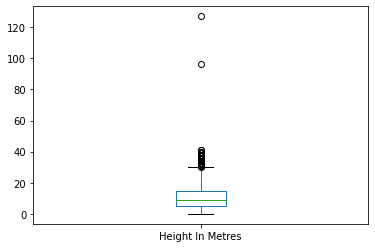

In [78]:
# Use a boxplot to find the outliers
trees['Height In Metres'].plot(kind='box')

In [79]:
# Select the crazy outlier rows
trees_outlier = trees[trees['Height In Metres'] > 80]
trees_outlier

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
1356,00001547,1.0,Beaumont Walk Estate,Housing,Robinia pseudoacacia,2017-05-23,2020/2021,96.0,10.0,63.0,E05000136,Haverstock,527847,184391,-0.157739,51.543941,"(51.543941, -0.157739)"
1863,00013862,1.0,Maitland Park Estate 1,Housing,Prunus avium,2017-05-16,2020/2021,127.0,9.0,34.0,E05000136,Haverstock,527987,184901,-0.155534,51.548497,"(51.548497, -0.155534)"


<hr/>

### 5.2 Outliers for Spread
Now repeat the analysis for spread.
<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

<AxesSubplot:>

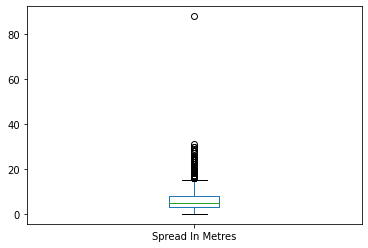

In [80]:
# Use a boxplot to find the outliers
trees['Spread In Metres'].plot(kind='box')

In [81]:
# Select the crazy outlier rows (if any)
spread_outlier = trees[trees['Spread In Metres'] > 60]
spread_outlier

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
18567,00045515,1.0,Broadfield Estate 1,Housing,Quercus robur,2018-04-26,2021/2022,8.0,88.0,17.0,E05000144,Swiss Cottage,525993,184693,-0.184348,51.547074,"(51.547074, -0.184348)"


<hr/>

### 5.3 Outliers for Diameter
Now repeat the analysis for diameter.
<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

<AxesSubplot:>

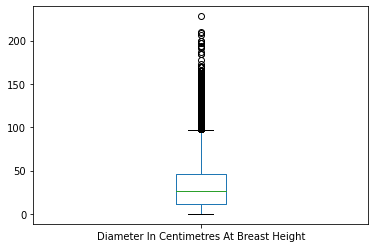

In [82]:
# Use a boxplot to find the outliers
trees['Diameter In Centimetres At Breast Height'].plot(kind='box')

In [83]:
# Select the outlier rows (if any)
diameter_outlier = trees[trees['Diameter In Centimetres At Breast Height'] > 225]
diameter_outlier

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
1157,00004100,1.0,"LONGFORD STREET, CLARENCE GDNS (LS)",Parks,Platanus x hispanica,2018-03-29,2020/2021,21.0,20.0,228.0,E05000142,Regent's Park,528931,182624,-0.142766,51.527816,"(51.527816, -0.142766)"


<hr/>

### 5.4 Observations

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Write down your observation about outliers in the data.  What assumptions did you make?  Were you comfortable making these assumptions?
    </font></div>


In the 'Height In Metres' column of the Trees Dataset, there are two outliers rows which has 96m and 127m height for 'Robinia pseudoacacia' and 'Prunus avium' trees. Online research(google) also shows that the average height of these two trees are 20-30 metres and up to 32 metres for 'Robinia pseudoacacia' and 'Prunus avium' trees respectively. It is advisable to replace these specific rows with average when doing analysis with this column.

In the 'Spread In Metres' column of the Trees Dataset, there is one outlier rows which has 88m height for 'Quercus robur' tree. Online research(google) also shows that the average spread of this tree is 11 metres and up to 14 metres in some species. It is advisable to replace these specific rows with average when doing analysis with this column.

In the 'Diameter In Centimetres At Breast Height' column of the Trees Dataset, there is one rows which has 228cm diameter for 'Platanus x hispanica' tree. Online research(google) also shows that the average spread of this tree is up to 3 metres in old species. It is advisable to confirm this specific tree diameter and make decision if there is need for proper protection. This row can be consider when doing the analysis when doing analysis with this column.

<hr/>

## Task 6: Identify Duplicates in the Trees Dataset
Sometimes data has duplicate entries.  This is another sign of data quality issues!

### 6.1 Find Duplicate Rows

In our dataset the `Identifier` column should be unique.  Find out if it is!  We've already used a function that can count how many times each value in a column exists.  Use is to see if we have duplicates in the trees Dataframe.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [84]:
# Find out if we have any duplicates
trees_duplicate = [trees['Identifier'].duplicated()]
trees_duplicate

[0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 23439    False
 23440    False
 23441    False
 23442    False
 23443    False
 Name: Identifier, Length: 23444, dtype: bool]

Now see if you can select the rows from trees DataFrame that are duplicates.  You will need to use the output from the cell above and use it to filter the trees dataframe.

In [85]:
# Select the rows that are duplicated
trees_duplicate_rows = trees[trees['Identifier'].duplicated(False)]
trees_duplicate_rows

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
1219,00060088,1.0,FREDERICK STREET,Highways,Vacant Tree Pit (planned: Access),2019-11-09,2022/2023,NaN,NaN,NaN,E05000141,King's Cross,530770,182696,-0.116241,51.528046,"(51.528046, -0.116241)"
4388,00032549,1.0,NARCISSUS ROAD,Highways,Betula albosinensis Fasc.,2018-09-19,2021/2022,9.0,6.0,19.0,E05000145,West Hampstead,525185,185127,-0.195840,51.551159,"(51.551159, -0.19584)"
5491,00000999,1.0,ALMA STREET,Highways,Sorbus hupehensis,2017-07-25,2020/2021,5.0,4.0,18.0,E05000139,Kentish Town,528834,184856,-0.143337,51.547904,"(51.547904, -0.143337)"
6111,00032549,1.0,NARCISSUS ROAD,Highways,Betula albosinensis Fasc.,2018-09-19,2021/2022,9.0,6.0,19.0,E05000145,West Hampstead,525185,185127,-0.195840,51.551159,"(51.551159, -0.19584)"
7027,00022744,1.0,YORK WAY,Highways,Ailanthus altissima,2019-10-30,2022/2023,7.5,3.0,18.0,E05000131,Cantelowes,529983,184724,-0.126837,51.546447,"(51.546447, -0.126837)"
9186,00022744,1.0,YORK WAY,Highways,Ailanthus altissima,2019-10-30,2022/2023,7.5,3.0,18.0,E05000131,Cantelowes,529983,184724,-0.126837,51.546447,"(51.546447, -0.126837)"
9482,00022674,1.0,WOODSOME ROAD,Highways,Sorbus,2017-10-07,2020/2021,7.0,6.0,28.0,E05000137,Highgate,528515,186109,-0.147481,51.559237,"(51.559237, -0.147481)"
10972,00060088,1.0,FREDERICK STREET,Highways,Vacant Tree Pit (planned: Acer campestre eco s...,2019-11-09,2022/2023,NaN,NaN,NaN,E05000141,King's Cross,530770,182696,-0.116241,51.528046,"(51.528046, -0.116241)"
13098,00000999,1.0,ALMA STREET,Highways,Sorbus hupehensis,2017-07-25,2020/2021,5.0,4.0,18.0,E05000139,Kentish Town,528834,184856,-0.143337,51.547904,"(51.547904, -0.143337)"
13628,00022674,1.0,WOODSOME ROAD,Highways,Sorbus,2017-10-07,2020/2021,7.0,6.0,28.0,E05000137,Highgate,528515,186109,-0.147481,51.559237,"(51.559237, -0.147481)"


In [86]:
trees_duplicate_rows.shape

(12, 17)

<hr/>

### 6.2 Observations

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Write down your observations about duplicates in trees.
    </font></div>


In the 'Identifier' column as the primary(Unique) column. It can be observed that it has 23438 unique rows with 6 row duplicated. A further check on the duplicated rows show that they have the same values across each column on the rows. This has further confirmed that the rows were mistakenly enter twice and there is need for one of the duplicated rows to be removed before any analysis is carried out.

<hr/>

## Task 7: Identify Geolocation Issues
The geographic coordinates (Easting and Northing) can be used to plot the trees on a map.  We can use this approach to see if there are any unusual tree locations!

We will make a copy of the original trees dataset and remove any rows that have a missing easting or northing as these can't be plotted on the map.

We can copy the DataFrame using:

- [pandas.DataFrame.copy](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html)

We can use the DataFrame filtering technique we saw before to remove the missing values.  E.g. the following code filters out rows where the value for 'mycolumn' is 100:

    mask = df['mycolumn'] != 100
    df = df[mask]

You can also create masks using a function, e.g. this creates a mask which excludes nulls:

    mask = df['mycolumn'].isnull()

We can use this function to plot the trees on a map. Set x to "Easting" and y to "Northing" and set a figsize parameter to (6, 6) to get a square aspect ratio:

- [pandas.DataFrame.plot.scatter](https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.plot.scatter.html)




### 7.1 Remove Trees with Missing Geo-coordinates
Check if there are any rows with null or 0 geo-coordinates.  If there are, remove them as we can't plot these.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [87]:
# Make a copy of the trees
geotrees = trees.copy()

In [88]:
eastings_with_nulls = any(geotrees['Easting'].isnull())
eastings_with_nulls

False

In [89]:
# Remove null Eastings
geotrees = geotrees.dropna(subset=['Easting'])

In [90]:
# eastings_with_0s
eastings_with_0s = any(geotrees['Easting'].isin([0]))
eastings_with_0s
eastings_with_0s = geotrees[(geotrees['Easting'].isin([0]))]
eastings_with_0s

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
2,00059953,1.0,Estate 51 Ravenshaw Street,Housing,Ficus carica,NaT,NaN,5.0,4.0,10.0,NaN,NaN,0,0,NaN,NaN,NaN
7,00060359,1.0,TOTTENHAM COURT ROAD,Highways,Vacant Tree Pit (planned: Acer campestre),NaT,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
21,00060252,1.0,"KILBURN GRANGE, MESSINA AVE (LS)",Parks,Vacant Tree Pit,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
24,00058873,1.0,GREENAWAY GARDENS,Highways,Liquidambar styraciflua,NaT,NaN,0.0,0.0,0.0,NaN,NaN,0,0,NaN,NaN,NaN
29,00059136,1.0,"BLOOMSBURY SQUARE, GARDENS (LS)",Parks,Cornus kousa Milky Way,NaT,NaN,1.8,1.5,3.0,NaN,NaN,0,0,NaN,NaN,NaN
38,00059145,1.0,"BLOOMSBURY SQUARE, GARDENS (LS)",Parks,Cornus kousa Milky Way,NaT,NaN,1.8,1.5,3.0,NaN,NaN,0,0,NaN,NaN,NaN
45,00060407,1.0,Bells Hill Estate,Housing,Tilia cordata,NaT,NaN,5.0,3.0,10.0,NaN,NaN,0,0,NaN,NaN,NaN
52,00059138,1.0,"BLOOMSBURY SQUARE, GARDENS (LS)",Parks,Cornus kousa Milky Way,NaT,NaN,1.8,1.5,3.0,NaN,NaN,0,0,NaN,NaN,NaN
64,00059380,0.0,HAVERSTOCK HILL (PRIV),Highways,Magnolia unidentified species,2019-05-03,2021/2022,0.0,0.0,0.0,NaN,NaN,0,0,NaN,NaN,NaN
65,00060385,1.0,Broadfield Estate 2,Housing,Sambucus nigra,NaT,NaN,4.0,4.0,15.0,NaN,NaN,0,0,NaN,NaN,NaN


In [97]:
eastings_with_0s.shape

(56, 17)

In [91]:
# Remove 0 Eastings.  
geotrees = geotrees[geotrees['Easting'] != 0]
geotrees

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
0,00060053,1.0,Russell Nurseries Estate,Housing,Vacant Tree Pit,NaT,NaN,NaN,NaN,NaN,E05000135,Hampstead Town,527305,185240,-0.165240,51.551693,"(51.551693, -0.16524)"
1,00057855,1.0,BRECKNOCK JMI (E),Education,Vacant Tree Pit,2019-07-17,2022/2023,NaN,NaN,NaN,E05000131,Cantelowes,529923,184782,-0.127681,51.546984,"(51.546984, -0.127681)"
3,00059915,1.0,ROSARY RC JMI (E),Education,Betula jacquemontii,NaT,NaN,4.0,1.0,6.0,E05000135,Hampstead Town,527249,185261,-0.166051,51.551901,"(51.551901, -0.166051)"
4,00010762,1.0,Holly Lodge Estate,Housing,Ilex x altaclarensis,2017-06-14,2020/2021,14.0,6.0,26.0,E05000137,Highgate,528414,186770,-0.148704,51.565198,"(51.565198, -0.148704)"
5,00007523,1.0,Westcroft Estate 1,Housing,Betula pendula,2018-08-06,2021/2022,9.0,7.0,29.0,NaN,NaN,524253,185982,-0.208975,51.559049,"(51.559049, -0.208975)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23439,00057455,1.0,"KILBURN GRANGE, MESSINA AVE (LS)",Parks,Sorbus aria,2017-03-28,2019/2020,2.0,1.0,6.0,E05000140,Kilburn,525130,184418,-0.196884,51.544796,"(51.544796, -0.196884)"
23440,00015494,1.0,OSSULSTON STREET,Highways,Sorbus aria 'Majestica',2019-10-28,2022/2023,12.0,6.0,48.0,E05000143,St Pancras and Somers Town,529758,183095,-0.130667,51.531863,"(51.531863, -0.130667)"
23441,00001693,1.0,BELMONT STREET,Highways,Platanus x hispanica,2017-07-31,2020/2021,18.0,10.0,57.0,E05000136,Haverstock,528302,184457,-0.151163,51.544432,"(51.544432, -0.151163)"
23442,00020342,1.0,Templar House Estate,Housing,Tilia europaea,2018-11-05,2021/2022,20.0,8.0,40.0,E05000132,Fortune Green,524615,184714,-0.204206,51.547573,"(51.547573, -0.204206)"


In [92]:
Northings_with_nulls = any(geotrees['Northing'].isnull())
Northings_with_nulls

False

In [93]:
# Remove null Northings
geotrees = geotrees.dropna(subset=['Northing'])

In [94]:
# Remove 0 Northings.  
geotrees = geotrees[geotrees['Northing'] != 0]
geotrees

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
0,00060053,1.0,Russell Nurseries Estate,Housing,Vacant Tree Pit,NaT,NaN,NaN,NaN,NaN,E05000135,Hampstead Town,527305,185240,-0.165240,51.551693,"(51.551693, -0.16524)"
1,00057855,1.0,BRECKNOCK JMI (E),Education,Vacant Tree Pit,2019-07-17,2022/2023,NaN,NaN,NaN,E05000131,Cantelowes,529923,184782,-0.127681,51.546984,"(51.546984, -0.127681)"
3,00059915,1.0,ROSARY RC JMI (E),Education,Betula jacquemontii,NaT,NaN,4.0,1.0,6.0,E05000135,Hampstead Town,527249,185261,-0.166051,51.551901,"(51.551901, -0.166051)"
4,00010762,1.0,Holly Lodge Estate,Housing,Ilex x altaclarensis,2017-06-14,2020/2021,14.0,6.0,26.0,E05000137,Highgate,528414,186770,-0.148704,51.565198,"(51.565198, -0.148704)"
5,00007523,1.0,Westcroft Estate 1,Housing,Betula pendula,2018-08-06,2021/2022,9.0,7.0,29.0,NaN,NaN,524253,185982,-0.208975,51.559049,"(51.559049, -0.208975)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23439,00057455,1.0,"KILBURN GRANGE, MESSINA AVE (LS)",Parks,Sorbus aria,2017-03-28,2019/2020,2.0,1.0,6.0,E05000140,Kilburn,525130,184418,-0.196884,51.544796,"(51.544796, -0.196884)"
23440,00015494,1.0,OSSULSTON STREET,Highways,Sorbus aria 'Majestica',2019-10-28,2022/2023,12.0,6.0,48.0,E05000143,St Pancras and Somers Town,529758,183095,-0.130667,51.531863,"(51.531863, -0.130667)"
23441,00001693,1.0,BELMONT STREET,Highways,Platanus x hispanica,2017-07-31,2020/2021,18.0,10.0,57.0,E05000136,Haverstock,528302,184457,-0.151163,51.544432,"(51.544432, -0.151163)"
23442,00020342,1.0,Templar House Estate,Housing,Tilia europaea,2018-11-05,2021/2022,20.0,8.0,40.0,E05000132,Fortune Green,524615,184714,-0.204206,51.547573,"(51.547573, -0.204206)"


In [95]:
# Confirm how many rows we have
geotrees.shape

(23388, 17)

<hr/>

### 7.2 Plot Map of Trees
Now make the plot.  Do a scatter plot of Northing vs Easting. You should obtain an outline of the map of Camden. Compare that outline with a real map of Camden (use good old google maps!). You’ll be able to spot the trees that should not be in that dataset from there!

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cell
    </font></div>

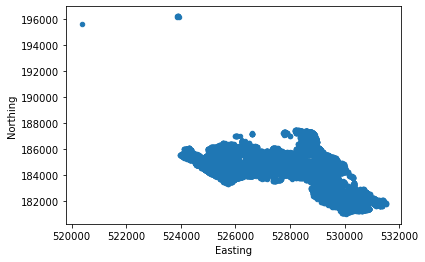

In [211]:
# Plot the trees on a map
#scatter plot
import matplotlib.pyplot as plt
geotrees.plot.scatter(x ='Easting', y ='Northing')
plt.show()

### 7.3 Find Trees Outside Camden
From the scatter plot, you should be able to determine how to select the rows from the trees data set containing the offending trees (using the Easting and Northing values)

Select the rows containing trees outside of Camden.  Use the filter technique again.

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [212]:
# Select the outlier rows
geotrees_outliers = geotrees[((geotrees['Northing'] > 190000))]
geotrees_outliers

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
78,00044991,1.0,Bells Hill Estate,Housing,Fraxinus excelsior,2017-04-28,2020/2021,20.0,10.0,49.0,NaN,NaN,523883,196179,-0.210713,51.650765,"(51.650765, -0.210713)"
298,00045000,1.0,Estate 167 Furzehill Road,Housing,Pinus sylvestris,2017-04-28,2020/2021,10.0,3.0,41.0,NaN,NaN,520367,195595,-0.261719,51.646283,"(51.646283, -0.261719)"
660,00044992,1.0,Bells Hill Estate,Housing,Crataegus monogyna,2017-04-28,2020/2021,4.0,4.0,7.0,NaN,NaN,523875,196170,-0.210830,51.650690,"(51.65069, -0.21083)"
1526,00044995,1.0,Bells Hill Estate,Housing,Fraxinus excelsior,2017-04-28,2020/2021,18.0,12.0,54.0,NaN,NaN,523936,196127,-0.209969,51.650287,"(51.650287, -0.209969)"
5392,00044990,1.0,Bells Hill Estate,Housing,Aesculus hippocastanum,2017-04-28,2020/2021,22.0,12.0,67.0,NaN,NaN,523889,196188,-0.210618,51.650843,"(51.650843, -0.210618)"
18069,00044993,1.0,Bells Hill Estate,Housing,Tilia cordata,2017-04-28,2020/2021,23.0,14.0,89.0,NaN,NaN,523867,196159,-0.210957,51.650590,"(51.65059, -0.210957)"
18078,00044601,1.0,Bells Hill Estate,Housing,Tilia cordata,2017-04-28,2020/2021,21.0,12.0,56.0,NaN,NaN,523905,196174,-0.210394,51.650719,"(51.650719, -0.210394)"
19532,00044988,1.0,Bells Hill Estate,Housing,Tilia cordata,2017-04-28,2020/2021,21.0,12.0,65.0,NaN,NaN,523909,196169,-0.210340,51.650676,"(51.650676, -0.21034)"


In [213]:
geotrees_outliers.shape

(8, 17)

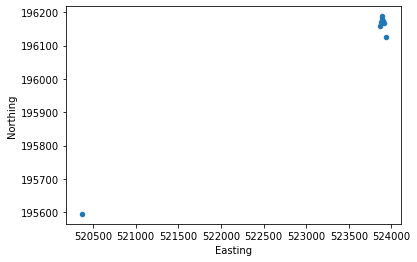

In [214]:
geotrees_outliers.plot.scatter(x ='Easting', y ='Northing')
plt.show()

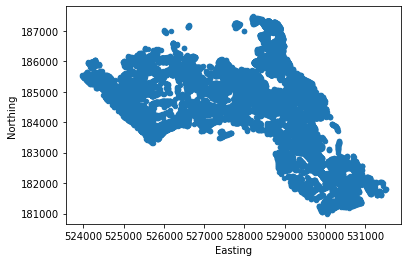

In [215]:
# Map after removing the outlier
geotrees_outliers1 = geotrees[((geotrees['Northing'] < 192000))]
geotrees_outliers1.plot.scatter(x ='Easting', y ='Northing')
plt.show()

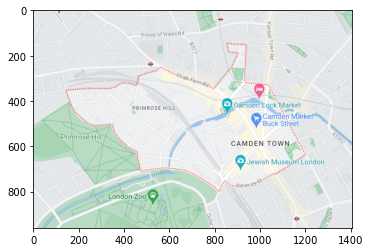

In [216]:
image_path= r'C:\Users\write\OneDrive\Desktop\OpenClassroom\Project 3\map.png'

# Read the image
image = plt.imread(image_path)

# Display the image using imshow
plt.imshow(image)

# Show the plot
plt.show()

In [98]:
import pandas as pd
import folium


# Get the easting and northing values
easting = trees["Easting"]
northing = trees["Northing"]

# Create a Folium map
map = folium.Map(location=[51.5407475, -0.1535822], zoom_start=15)

# Add the points to the map
for i in range(len(trees)):
    folium.Marker(
        location=[northing[i], easting[i]],
        icon=folium.Icon(color="red", icon="tree"),
    ).add_to(map)

# Display the map
map.save('map.html')

<hr/>

### 7.4 Observations


<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Write down your observation about geolocation issues.
    </font></div>


In the 'Easting' and 'Northing' columns, there are 56 rows with incorrect (0 values) location. Representing an in significant size of 0.23%. This would not affect the analysis of the data but will have to be excluded in plotting the trees on the map.
After looking up the shape of the Camden council on google maps. It can be seen that at least 8 trees are out (outliers) of the jurisdiction of camden council when compared with the shape of Scatterplot using the Easting and Northing coordinates. After exclusion the shape (scatter plot) looks much like the shape of Camden Council on google maps. These outliers are better excluded from any analysis. 

<hr/>

## Task 8: Identify Unmatched Data
We have multiple datasets that will need to be joined together to produce the analyses required by the Camden Parks and Open Spaces team.  The data will need to be joined in the following way:

- Use the `Identifier` column in the trees dataset to match to the `Identifier` column in the environmental data set (so we can bring in the environmental data for each tree)
- Use the `Scientific Name` column in the trees dataset to match to the `Scientific Name` column in the common names data set (so we can look up the `Common Name`)

There may be mismatches in the data.  Of particular concern we want to check

- That every tree in the trees dataset has matching environmental data in the environmental data set
- That every environmental row in the environmental dataset has matching tree data in the tree data set
- That every scientific name in the trees dataset has a matching common name in the common names data set

We aren't too concerned about the reverse of the last scenario (if we have extra names in the common names dataset that aren't in the trees data set).  We don't expect Camden to have a specimen of every tree that exists!  

There are a few ways this can be done, but one technique is to use the `isin` function to check if some column in one dataframe contains values that are in another column in another dataframe.  This creates a mask containing rows that match between the two dataframes:

    mask = df1['column_name1'].isin(df2['column_name2'])
    
To select the non-matching rows, we can use Python's bitwise not operator ~:

    mask = ~df1['column_name1'].isin(df2['column_name2'])
    
As we have seen before, the mask can be used to select that subset of rows back from the original dataframe.

### 8.1 Find Trees that Don't have Matching Environmental Data
<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [158]:
# trees that have matching environmental data
treesEnviron = trees[(trees['Identifier'].isin(environmental['Identifier']))]
treesEnviron

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
0,00060053,1.0,Russell Nurseries Estate,Housing,Vacant Tree Pit,NaT,NaN,NaN,NaN,NaN,E05000135,Hampstead Town,527305,185240,-0.165240,51.551693,"(51.551693, -0.16524)"
1,00057855,1.0,BRECKNOCK JMI (E),Education,Vacant Tree Pit,2019-07-17,2022/2023,NaN,NaN,NaN,E05000131,Cantelowes,529923,184782,-0.127681,51.546984,"(51.546984, -0.127681)"
2,00059953,1.0,Estate 51 Ravenshaw Street,Housing,Ficus carica,NaT,NaN,5.0,4.0,10.0,NaN,NaN,0,0,NaN,NaN,NaN
3,00059915,1.0,ROSARY RC JMI (E),Education,Betula jacquemontii,NaT,NaN,4.0,1.0,6.0,E05000135,Hampstead Town,527249,185261,-0.166051,51.551901,"(51.551901, -0.166051)"
4,00010762,1.0,Holly Lodge Estate,Housing,Ilex x altaclarensis,2017-06-14,2020/2021,14.0,6.0,26.0,E05000137,Highgate,528414,186770,-0.148704,51.565198,"(51.565198, -0.148704)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23439,00057455,1.0,"KILBURN GRANGE, MESSINA AVE (LS)",Parks,Sorbus aria,2017-03-28,2019/2020,2.0,1.0,6.0,E05000140,Kilburn,525130,184418,-0.196884,51.544796,"(51.544796, -0.196884)"
23440,00015494,1.0,OSSULSTON STREET,Highways,Sorbus aria 'Majestica',2019-10-28,2022/2023,12.0,6.0,48.0,E05000143,St Pancras and Somers Town,529758,183095,-0.130667,51.531863,"(51.531863, -0.130667)"
23441,00001693,1.0,BELMONT STREET,Highways,Platanus x hispanica,2017-07-31,2020/2021,18.0,10.0,57.0,E05000136,Haverstock,528302,184457,-0.151163,51.544432,"(51.544432, -0.151163)"
23442,00020342,1.0,Templar House Estate,Housing,Tilia europaea,2018-11-05,2021/2022,20.0,8.0,40.0,E05000132,Fortune Green,524615,184714,-0.204206,51.547573,"(51.547573, -0.204206)"


In [163]:
# Find trees that don't have matching environmental data
not_in_treesEnviron = trees[~(trees['Identifier'].isin(environmental['Identifier']))]
not_in_treesEnviron

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
66,00059712,1.0,Maiden Lane Estate,Housing,Acer saccharinum,2019-05-28,2022/2023,12.0,5.0,20.0,E05000131,Cantelowes,529795,184142,-0.129750,51.541266,"(51.541266, -0.12975)"
125,00048578,1.0,BUCK STREET,Highways,Sorbus aucuparia,2017-07-19,2020/2021,6.0,2.0,10.0,E05000130,Camden Town with Primrose Hill,528900,184020,-0.142698,51.540371,"(51.540371, -0.142698)"
1148,00006577,1.0,FAWLEY ROAD,Highways,Tilia euchlora,2018-09-28,2021/2022,15.0,6.0,38.0,E05000145,West Hampstead,525572,185015,-0.190313,51.550062,"(51.550062, -0.190313)"
1998,00007366,1.0,"FORTUNE GREEN RD, OPEN SPACE (LS)",Parks,Ilex aquifolium,2017-03-21,2019/2020,9.0,6.0,44.0,E05000132,Fortune Green,525074,185541,-0.197304,51.554901,"(51.554901, -0.197304)"
2246,00014633,1.0,Mortimer Estate,Housing,Tilia europaea,2019-01-29,2021/2022,16.0,12.0,47.0,E05000140,Kilburn,525763,183613,-0.188060,51.537424,"(51.537424, -0.18806)"
5478,00060382,1.0,SHAFTESBURY AVENUE,Highways,Vacant Tree Pit,NaT,NaN,NaN,NaN,NaN,E05000138,Holborn and Covent Garden,530073,181247,-0.126813,51.515186,"(51.515186, -0.126813)"
10637,00002874,1.0,BURGHLEY ROAD,Highways,Platanus x hispanica,2017-08-14,2020/2021,20.0,8.0,52.0,E05000139,Kentish Town,529119,185889,-0.138863,51.557120,"(51.55712, -0.138863)"
10977,00055227,1.0,BURGHLEY ROAD,Highways,Amelanchier lamarckii,2017-08-14,2020/2021,3.0,2.0,5.0,E05000139,Kentish Town,528920,185694,-0.141802,51.555408,"(51.555408, -0.141802)"
11795,00016702,1.0,"RED LION SQUARE, GARDENS (LS)",Parks,Platanus x hispanica,2018-06-04,2021/2022,30.0,23.0,165.0,E05000138,Holborn and Covent Garden,530572,181701,-0.119460,51.519146,"(51.519146, -0.11946)"
11856,00054744,1.0,Carrol & Sanderson Close Estate,Housing,Prunus unidentified species,2017-01-06,2020/2021,3.0,3.0,13.0,E05000137,Highgate,528661,185556,-0.145585,51.554226,"(51.554226, -0.145585)"


In [164]:
# Confirm how many rows we have
not_in_treesEnviron.shape

(23, 17)

In [179]:
# the two tables combined
merge_treesEnviron = trees.merge(environmental, on='Identifier', how='right')
merge_treesEnviron

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,...,Latitude,Location,Maturity,Physiological Condition,Tree Set To Be Removed,Removal Reason,Capital Asset Value For Amenity Trees,Carbon Storage In Kilograms,Gross Carbon Sequestration Per Year In Kilograms,Pollution Removal Per Year In Grams
0,00055125,1.0,Holly Lodge Estate,Housing,Prunus 'Shirotae',2017-06-14,2020/2021,2.0,1.5,4.0,...,51.565419,"(51.565419, -0.147158)",Juvenile,Good,No,NaN,115.07,1.6,0.5,5.7
1,00059429,1.0,BAYNES ST NATURE RESERVE (LS),Parks,Acer platanoides,2019-03-20,2021/2022,9.0,8.0,28.0,...,51.540823,"(51.540823, -0.13639)",Middle aged,Fair,No,NaN,7518.08,NaN,NaN,NaN
2,00018254,1.0,SOUTH HILL PARK GARDENS,Highways,Tilia platyphyllos,2017-07-25,2020/2021,13.0,6.0,52.0,...,51.558866,"(51.558866, -0.16365)",Mature,Fair,No,NaN,20419.63,426.4,8.8,215.2
3,00027155,1.0,St Silas Street Estate 2,Housing,Fraxinus excelsior,2017-05-22,2020/2021,15.0,10.0,47.0,...,51.547199,"(51.547199, -0.153184)",Mature,Fair,No,NaN,21447.74,448.3,9.6,379.1
4,00041326,1.0,Primrose Hill Court Estate,Housing,Crataegus crus-galli,2019-07-05,2022/2023,5.0,2.0,9.0,...,51.542433,"(51.542433, -0.16017)",Juvenile,Good,No,NaN,524.30,9.9,1.4,12.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23416,00007869,1.0,GOLDHURST TERRACE,Highways,Acer platanoides,2018-11-09,2021/2022,15.0,7.0,39.0,...,51.542019,"(51.542019, -0.188864)",Mature,Fair,No,NaN,13126.91,368.4,9.4,331.2
23417,00002691,1.0,"BRUNSWICK SQUARE, GARDENS (LS)",Parks,Ailanthus altissima,2018-03-21,2020/2021,21.0,7.0,36.0,...,51.524751,"(51.524751, -0.122326)",Mature,Good,No,NaN,11185.06,197.6,7.8,170.7
23418,00005801,1.0,ELAINE GROVE,Highways,Prunus cerasifera 'Pissardii',2017-11-08,2020/2021,7.0,3.0,38.0,...,51.553669,"(51.553669, -0.153599)",Mature,Fair,No,NaN,7269.71,359.4,10.6,27.1
23419,00007948,1.0,Weedington Road Estate 1,Housing,Prunus padus,2017-04-27,2020/2021,7.0,5.0,21.0,...,51.551803,"(51.551803, -0.151268)",Middle aged,Fair,No,NaN,2854.52,90.4,4.7,60.8


### 8.2 Find Environmental Data that Doesn't have Matching Tree Data
<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [187]:
# environmental data that have matching tree data
environTrees = environmental[(environmental['Identifier'].isin(trees['Identifier']))]
environTrees

,Identifier,Maturity,Physiological Condition,Tree Set To Be Removed,Removal Reason,Capital Asset Value For Amenity Trees,Carbon Storage In Kilograms,Gross Carbon Sequestration Per Year In Kilograms,Pollution Removal Per Year In Grams
0,00055125,Juvenile,Good,No,NaN,115.07,1.6,0.5,5.7
1,00059429,Middle aged,Fair,No,NaN,7518.08,NaN,NaN,NaN
2,00018254,Mature,Fair,No,NaN,20419.63,426.4,8.8,215.2
3,00027155,Mature,Fair,No,NaN,21447.74,448.3,9.6,379.1
4,00041326,Juvenile,Good,No,NaN,524.30,9.9,1.4,12.8
...,...,...,...,...,...,...,...,...,...
23410,00007869,Mature,Fair,No,NaN,13126.91,368.4,9.4,331.2
23411,00002691,Mature,Good,No,NaN,11185.06,197.6,7.8,170.7
23412,00005801,Mature,Fair,No,NaN,7269.71,359.4,10.6,27.1
23413,00007948,Middle aged,Fair,No,NaN,2854.52,90.4,4.7,60.8


In [189]:
# Find environmental data that doesn't have matching tree data
Not_environTrees = environmental[~(environmental['Identifier'].isin(trees['Identifier']))]
Not_environTrees

,Identifier,Maturity,Physiological Condition,Tree Set To Be Removed,Removal Reason,Capital Asset Value For Amenity Trees,Carbon Storage In Kilograms,Gross Carbon Sequestration Per Year In Kilograms,Pollution Removal Per Year In Grams


In [190]:
# Confirm how many rows we have
NenvironTrees.shape

(0, 9)

### 8.3 Find Trees that Don't have Matching Common Names Data
<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Complete the following code cells
    </font></div>

In [191]:
# trees with scientific names that have matching common names data
treesNames = trees[(trees['Scientific Name'].isin(names['Scientific Name']))]
treesNames

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
0,00060053,1.0,Russell Nurseries Estate,Housing,Vacant Tree Pit,NaT,NaN,NaN,NaN,NaN,E05000135,Hampstead Town,527305,185240,-0.165240,51.551693,"(51.551693, -0.16524)"
1,00057855,1.0,BRECKNOCK JMI (E),Education,Vacant Tree Pit,2019-07-17,2022/2023,NaN,NaN,NaN,E05000131,Cantelowes,529923,184782,-0.127681,51.546984,"(51.546984, -0.127681)"
2,00059953,1.0,Estate 51 Ravenshaw Street,Housing,Ficus carica,NaT,NaN,5.0,4.0,10.0,NaN,NaN,0,0,NaN,NaN,NaN
3,00059915,1.0,ROSARY RC JMI (E),Education,Betula jacquemontii,NaT,NaN,4.0,1.0,6.0,E05000135,Hampstead Town,527249,185261,-0.166051,51.551901,"(51.551901, -0.166051)"
4,00010762,1.0,Holly Lodge Estate,Housing,Ilex x altaclarensis,2017-06-14,2020/2021,14.0,6.0,26.0,E05000137,Highgate,528414,186770,-0.148704,51.565198,"(51.565198, -0.148704)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23439,00057455,1.0,"KILBURN GRANGE, MESSINA AVE (LS)",Parks,Sorbus aria,2017-03-28,2019/2020,2.0,1.0,6.0,E05000140,Kilburn,525130,184418,-0.196884,51.544796,"(51.544796, -0.196884)"
23440,00015494,1.0,OSSULSTON STREET,Highways,Sorbus aria 'Majestica',2019-10-28,2022/2023,12.0,6.0,48.0,E05000143,St Pancras and Somers Town,529758,183095,-0.130667,51.531863,"(51.531863, -0.130667)"
23441,00001693,1.0,BELMONT STREET,Highways,Platanus x hispanica,2017-07-31,2020/2021,18.0,10.0,57.0,E05000136,Haverstock,528302,184457,-0.151163,51.544432,"(51.544432, -0.151163)"
23442,00020342,1.0,Templar House Estate,Housing,Tilia europaea,2018-11-05,2021/2022,20.0,8.0,40.0,E05000132,Fortune Green,524615,184714,-0.204206,51.547573,"(51.547573, -0.204206)"


In [193]:
# Find trees with scientific names that don't have matching common names data
not_in_treesNames = trees[~(trees['Scientific Name'].isin(names['Scientific Name']))]
not_in_treesNames

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
151,00051832,1.0,ARGYLE WALK,Highways,Sorbus aucuparia 'Streetwise',2019-02-10,2022/2023,7.0,3.0,12.0,E05000141,King's Cross,530227,182706,-0.124054,51.528257,"(51.528257, -0.124054)"
384,00053954,1.0,CHURCHILL ROAD,Highways,Sorbus aucuparia 'Streetwise',2017-10-07,2020/2021,3.0,2.0,5.0,E05000139,Kentish Town,529007,185975,-0.140440,51.557913,"(51.557913, -0.14044)"
495,00047497,1.0,PATSHULL PLACE,Highways,Sorbus aucuparia 'Streetwise',2017-06-22,2020/2021,5.0,3.0,11.0,E05000131,Cantelowes,529202,184717,-0.138094,51.546569,"(51.546569, -0.138094)"
611,00055434,1.0,SHARPLES HALL STREET,Highways,Sorbus aucuparia 'Streetwise',2019-09-30,2022/2023,2.0,2.0,4.0,E05000130,Camden Town with Primrose Hill,527962,184050,-0.156202,51.540853,"(51.540853, -0.156202)"
653,00055289,1.0,QUEEN'S CRESCENT,Highways,Sorbus aucuparia 'Streetwise',2017-07-08,2020/2021,4.0,1.0,7.0,E05000136,Haverstock,528072,184723,-0.154369,51.546881,"(51.546881, -0.154369)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21826,00050835,1.0,INGESTRE RD,Highways,Sorbus aucuparia 'Streetwise',2017-08-18,2020/2021,3.0,1.0,7.0,E05000139,Kentish Town,528962,185826,-0.141137,51.556589,"(51.556589, -0.141137)"
22948,00052341,1.0,NEW COMPTON STREET,Highways,Sorbus aucuparia 'Streetwise',2019-07-08,2022/2023,4.0,3.0,6.0,E05000138,Holborn and Covent Garden,529976,181160,-0.128249,51.514422,"(51.514422, -0.128249)"
23266,00048846,1.0,ASMARA ROAD,Highways,Sorbus aucuparia 'Streetwise',2018-08-28,2021/2022,5.0,3.0,8.0,E05000132,Fortune Green,524568,185347,-0.204661,51.553268,"(51.553268, -0.204661)"
23335,00048705,1.0,GOLDINGTON STREET,Highways,Sorbus aucuparia 'Streetwise',2019-10-23,2022/2023,6.0,2.0,12.0,E05000143,St Pancras and Somers Town,529662,183417,-0.131941,51.534780,"(51.53478, -0.131941)"


In [194]:
# Confirm how many rows we have
not_in_treesNames.shape

(76, 17)

In [195]:
# Common names dataset with scientific names that have matching common names data
Names_in_trees = names[(names['Scientific Name'].isin(trees['Scientific Name']))]
Names_in_trees

,Scientific Name,Common Name
0,Carpinus betulus Lucas,Hornbeam - European
1,Prunus 'Pandora',Cherry - Ornamental
2,Tilia unidentified species,Lime
3,Rosa unidentified species,None
4,Cedrus libani,Cedar of Lebanon
...,...,...
574,Larix decidua,European larch
577,Picea abies,Norway spruce
583,Pinus sylvestris,Scots pine
584,Taxus baccata,Yew


In [196]:
# Common names dataset with scientific names that dont't have matching common names data
names_not_in_trees = names[~(names['Scientific Name'].isin(trees['Scientific Name']))]
names_not_in_trees

,Scientific Name,Common Name
542,Aesculus hippocatanum,Horse chestnut
550,Fagus sylvatica purpurea,Copper Beech
552,Populus robusta,Hybrid poplar
553,Populus canescens,Grey poplar
556,Populus nigra italica,Lombardy poplar
558,prunus padus,Bird cherry
564,Salix cinerea,Grey willow
569,Tilia platyphyllus,Broad leaved Lime
570,Quercuis ilex,Evergreen oak
571,Abies nordmanniana,Nordman’s fir


In [197]:
not_Namestree.shape

(21, 2)

<hr/>

### 8.4 Observations

<div style="background-color:lemonchiffon; border:1px solid; padding:5px; margin:5px; font-weight:bold"><font color="crimson">
TODO: Write down your observation about unmatched data issues.
    </font></div>


There are 23 data in the Trees dataset that are unmatched in the Environmental dataset while all the data in the environmental dataset is matched with Trees dataset.
There are 76 Scientific names in the Trees dataset that does not have Common names (does not exist in the Common names dataset). The Camden council data team might need to consider getting this missing common names from other source (Website or organisation). However, there are also 21 Scientific names with common names in Common names dataset that does not exist in Trees dataset.

<hr/>

# END OF NOTEBOOK

In [ ]:
Overall, the three dataset can serve the purpose of the three projects (Public Tree Data, Tree Walks Brochures, Environment Report)
that the Parks and Open Spaces Office within the Camden Council’s new data initiative.